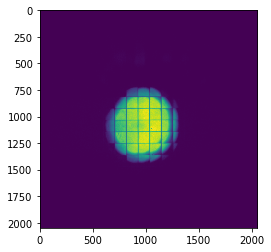

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys
sys.path.append("../") 
from wfslib.geometry import Geometry
from wfslib.wfs import WFSData

path1 = "data/bad_image.tiff"
path2 = "data/bad_image2.tiff"
path3 = "data/bad_image3.tiff"

arr = np.array(Image.open(path3))
arr = np.expand_dims(arr, 0)
# wfs = WFSData(arr)
# wfs.geometry.set_options(shift=(2, 2))

plt.imshow(arr[0])
# wfs.show_geometry()

In [36]:
wfs.geometry.options

NameError: name 'wfs' is not defined

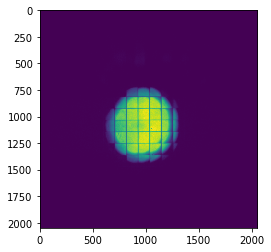

In [37]:
plt.imshow(arr[0])

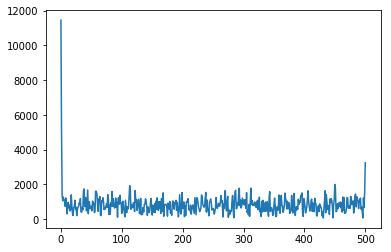

In [10]:
plt.plot(abs(np.fft.rfft(arr[0][0:,0])));

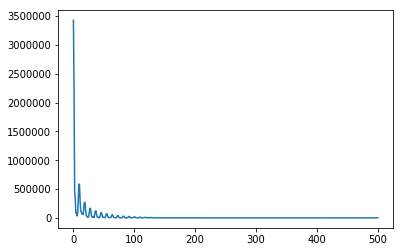

In [4]:
plt.plot(abs(np.fft.rfft(np.mean(arr[0],axis = 0))));

In [2]:
harz = abs(np.fft.rfft(np.mean(arr[0],axis = 0)))
print(harz)

[3.42539093e+06 2.27130261e+06 4.82046210e+05 3.34706934e+05
 8.37076802e+04 8.35188058e+04 3.38502225e+04 9.30963521e+04
 3.47895187e+05 5.87246779e+05 5.77370800e+05 2.83960153e+05
 1.21426875e+05 1.03156621e+05 6.58737293e+04 7.05174508e+04
 5.97795422e+04 1.75450876e+05 2.70167488e+05 2.66442260e+05
 1.38360643e+05 4.07640160e+04 3.28285904e+04 1.16513664e+04
 2.26977868e+04 1.65286138e+04 9.49952427e+04 1.65914567e+05
 1.63804948e+05 8.52116834e+04 2.42791441e+04 2.33040410e+04
 8.90466339e+03 1.89368520e+04 7.14290870e+03 6.02222988e+04
 1.17490122e+05 1.23279718e+05 6.70419609e+04 1.65443857e+04
 1.19228419e+04 5.12915030e+03 1.04229436e+04 3.63035019e+03
 3.89641131e+04 8.68257410e+04 9.37203648e+04 5.13415823e+04
 1.06747831e+04 1.09986777e+04 5.75783800e+03 7.16444717e+03
 4.20276732e+03 2.36049405e+04 6.28509073e+04 7.45348256e+04
 4.50578839e+04 1.13146438e+04 8.18161023e+03 5.80400876e+03
 3.93860463e+03 5.80292061e+03 1.33785741e+04 4.51953155e+04
 5.81741746e+04 3.788353

C:\Users\Zoya\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


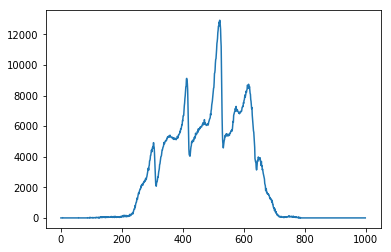

In [3]:
plt.plot(np.fft.ifft(np.fft.fft(np.median(arr[0],axis = 0))));

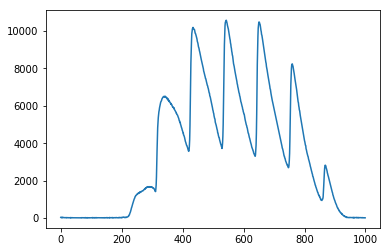

In [4]:
plt.plot(np.mean(arr[0],axis = 1));

In [100]:
import h5py
h5f = h5py.File('one_frame.h5','r')
data = h5f['image'][:]

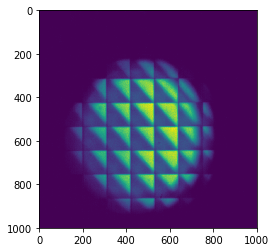

In [6]:
plt.imshow(arr[0])

In [8]:
import pywt
coeffs = pywt.wavedec(np.mean(arr[0],axis = 0), 'db2', level = 5)   
ca, cd = coeffs[0],coeffs[1:]  

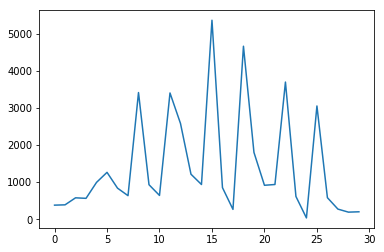

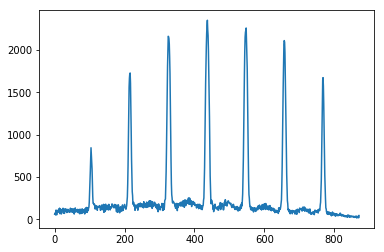

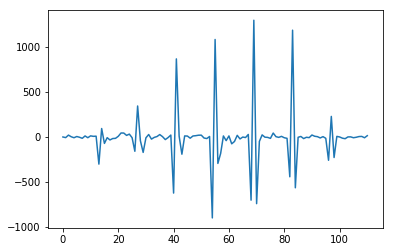

In [9]:
plt.plot(ca)
plt.show()
plt.plot(np.mean(arr[0],axis = 0))
plt.show()
plt.plot(cd[2])
plt.show()

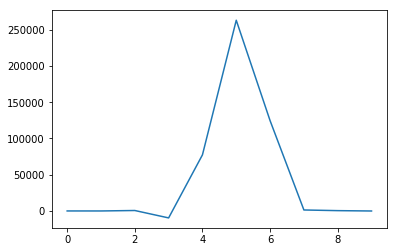

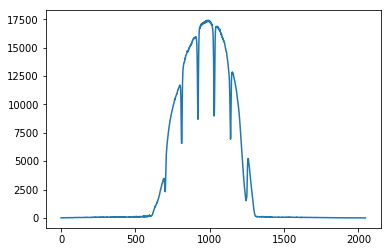

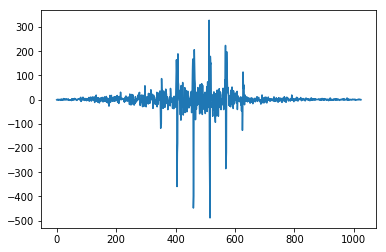

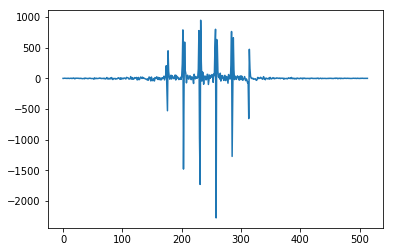

In [38]:
coeffs = pywt.wavedec(np.mean(arr[0],axis = 0), 'db2', level = 8)   
ca, cd = coeffs[0],coeffs[1:]  

plt.plot(ca)
plt.show()
plt.plot(np.mean(arr[0],axis = 0))
plt.show()
plt.plot(cd[7])
plt.show()
plt.plot(cd[6])
plt.show()


In [12]:
widths = np.arange(1, 2)
cwtmatr, freqs = pywt.cwt(np.mean(arr[0],axis = 0),widths, 'mexh')   

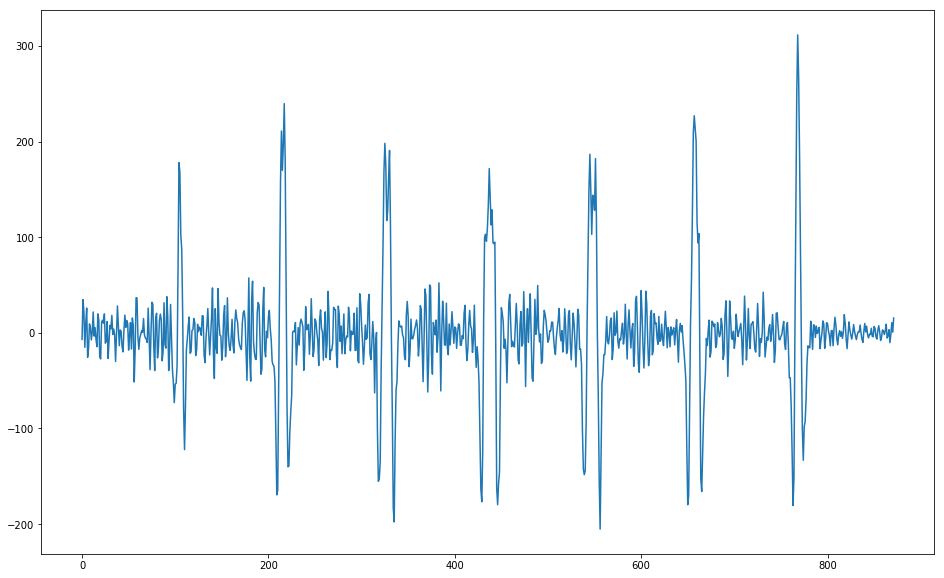

In [13]:
plt.figure(figsize = (16,10))
plt.plot(cwtmatr[0])

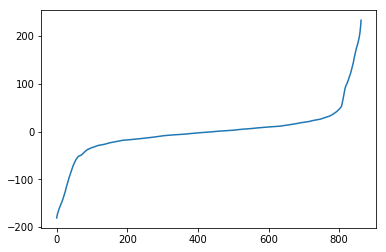

In [14]:
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

sort_sig =moving_average(sorted(cwtmatr[0]))
# plt.plot(sort_sig[10:120])
plt.plot(sort_sig)

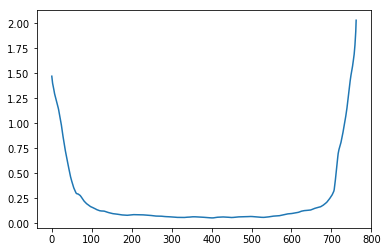

In [15]:

sdif = moving_average(np.diff(sort_sig),100)
plt.plot(sdif)

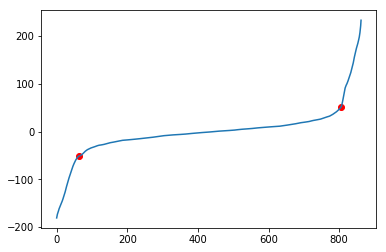

In [16]:
std = np.std(sort_sig)
mask_1 = np.where(sort_sig > std)[0]
mask_2 = np.where(sort_sig < -std)[0]
plt.plot(sort_sig)
plt.scatter(mask_1[0],sort_sig[mask_1[0]], color = 'r')
plt.scatter(mask_2[-1],sort_sig[mask_2[-1]], color = 'r')

In [17]:
mask1 = np.where(cwtmatr[0] > std)[0]
mask2 = np.where(cwtmatr[0] < -std)[0]

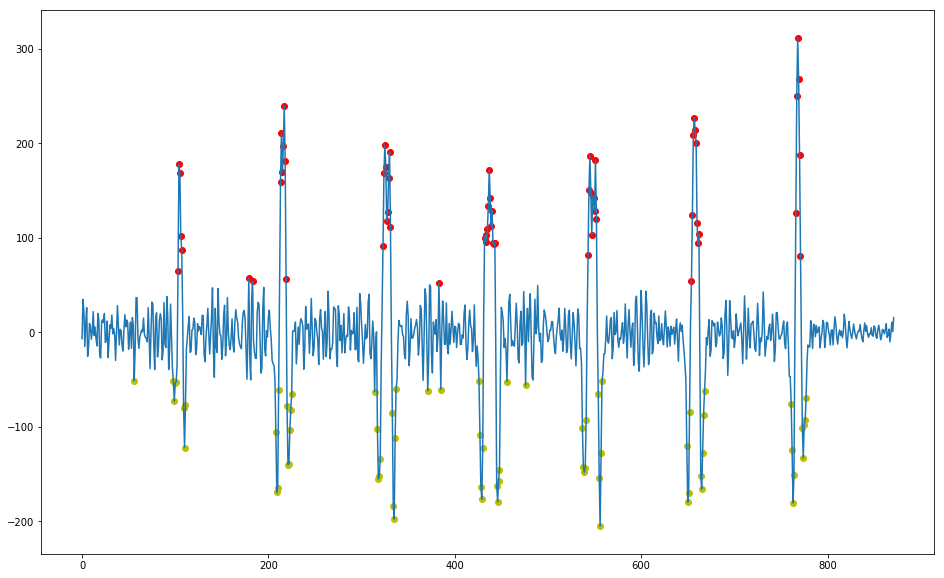

In [18]:
plt.figure(figsize = (16,10))
plt.plot(cwtmatr[0])
plt.scatter(mask1, cwtmatr[0][mask1], color = 'r')
plt.scatter(mask2, cwtmatr[0][mask2], color = 'y')

In [39]:

d = arr[0]
coeffs = pywt.wavedec(np.mean(d,axis = 0), 'db2', level = 10)   
ca, cd = coeffs[0],coeffs[1:]   

C:\Users\Zoya\Anaconda3\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [40]:
def cell_width(extremums):
    widths = []
    for i in range(1,len(extremums)):
        widths.append(extremums[i]-extremums[i-1])

    return widths
    

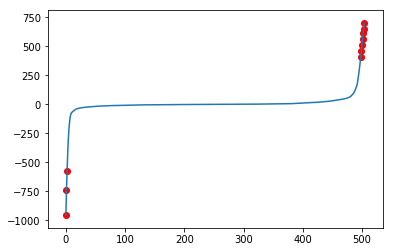

In [61]:
dat = cd[8]
sort_sig =moving_average(sorted(dat))

std = np.std(sort_sig)
std_max = np.mean([std, np.max(sort_sig)])
std_min = np.mean([-std, np.min(sort_sig)])

mask_1 = np.where(sort_sig > std_max)[0]
mask_2 = np.where(sort_sig < std_min)[0]
plt.plot(sort_sig)


plt.scatter(mask_1,sort_sig[mask_1], color = 'r')
plt.scatter(mask_2,sort_sig[mask_2], color = 'r')



[25, 3, 24, 3, 24, 1, 2, 1, 24, 3, 27]
[27, 27, 1, 27, 27, 28]


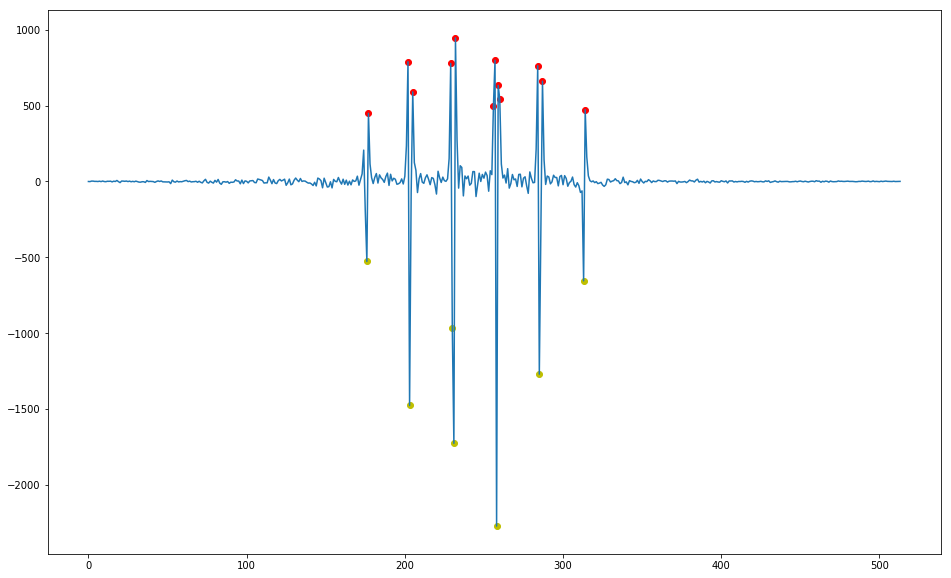

In [62]:

mask1 = np.where(dat > std_max)[0]
mask2 = np.where(dat < std_min)[0]

plt.figure(figsize = (16,10))
plt.plot(dat)
plt.scatter(mask1, dat[mask1], color = 'r')
plt.scatter(mask2, dat[mask2], color = 'y')

print(cell_width(mask1))
print(cell_width(mask2))

In [162]:
center

5